## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data and take a glimpse of them

In [2]:
train = pd.read_csv('train.csv')

In [3]:
print("size of the train data: {}".format(train.shape))

size of the train data: (15120, 56)


In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
train['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

#### Note: Balanced data

In [7]:
X = train.drop(['Cover_Type'], axis = 1)
Y = train['Cover_Type']

#### One hot encoding (with pandas)

In [8]:
y = pd.get_dummies(Y)

#### Splitting the training data 

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .3)

### Feature Scaling
transform the data such that its distribution will have a mean value 0 and standard deviation of 1

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Building the Deep Neural Network
- 2 hidden layers
- 54 -> 1024 -> 256 -> 7

### weight initialization 
- he_normal 
<br> It draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / fan_in) where fan_in is the number of input units in the weight tensor.
<br> References: Kaiming He
https://arxiv.org/pdf/1502.01852.pdf

### Activation functions

- $RELU(Z) = max(0, Z)$


- $SOFTMAX(Z) = 1/(1+e^Z)$

### Optimizer
Adam
- learning rate: lr=0.01  
- beta_1=0.9, beta_2=0.999  (paper's default)
- epsilon= 1e-08 (paper's default)
- learning rate decay: decay=0.1  
- batch size: 256
- epochs=100
- loss function: loss=categorical_crossentropy 


<br> References:  
- https://medium.com/@nishantnikhil/adam-optimizer-notes-ddac4fd7218
- the paper: https://arxiv.org/pdf/1502.03167.pdf

### Batch normalization
Used Batch normalization to normalize the input layer by adjusting and scaling the activations.

<br> References:  
- Andrew Ng's Coursera Course: Improving Deep Neural Networks 
- the paper: https://arxiv.org/pdf/1412.6980.pdf

### Weight Regularization: L2
Used Weight Regularization L2 to prevent overfitting

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization

C:\Users\spiro\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
features_num = x_train.shape[1]

In [13]:
model = Sequential()
model.add(Dense(1024, input_shape=(features_num,),kernel_regularizer='l2', 
                kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,kernel_regularizer='l2', kernel_initializer='he_normal', 
                activation='relu'))
model.add(BatchNormalization())
model.add(Dense(7, activation='softmax'))
model.compile(Adam(lr=0.01,epsilon= 1e-08, decay=0.1),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [14]:
results = model.fit(x_train, y_train, epochs=100, 
                    batch_size=256, validation_data=(x_test, y_test), verbose=2)

Train on 10584 samples, validate on 4536 samples
Epoch 1/100
 - 5s - loss: 13.5907 - acc: 0.6436 - val_loss: 6.8843 - val_acc: 0.5888
Epoch 2/100
 - 0s - loss: 4.9825 - acc: 0.7140 - val_loss: 4.3218 - val_acc: 0.4599
Epoch 3/100
 - 0s - loss: 3.2512 - acc: 0.7296 - val_loss: 3.2573 - val_acc: 0.5064
Epoch 4/100
 - 0s - loss: 2.4710 - acc: 0.7601 - val_loss: 2.6918 - val_acc: 0.5679
Epoch 5/100
 - 0s - loss: 2.0266 - acc: 0.7697 - val_loss: 2.3461 - val_acc: 0.5553
Epoch 6/100
 - 0s - loss: 1.7275 - acc: 0.7831 - val_loss: 2.0666 - val_acc: 0.5902
Epoch 7/100
 - 0s - loss: 1.5110 - acc: 0.7971 - val_loss: 1.8810 - val_acc: 0.6030
Epoch 8/100
 - 0s - loss: 1.3710 - acc: 0.8011 - val_loss: 1.6407 - val_acc: 0.6620
Epoch 9/100
 - 0s - loss: 1.2485 - acc: 0.8043 - val_loss: 1.4905 - val_acc: 0.6803
Epoch 10/100
 - 0s - loss: 1.1490 - acc: 0.8153 - val_loss: 1.3426 - val_acc: 0.7253
Epoch 11/100
 - 0s - loss: 1.0637 - acc: 0.8193 - val_loss: 1.2664 - val_acc: 0.7423
Epoch 12/100
 - 0s - los

Epoch 97/100
 - 0s - loss: 0.2470 - acc: 0.9755 - val_loss: 0.6479 - val_acc: 0.8406
Epoch 98/100
 - 0s - loss: 0.2464 - acc: 0.9769 - val_loss: 0.6529 - val_acc: 0.8375
Epoch 99/100
 - 0s - loss: 0.2448 - acc: 0.9767 - val_loss: 0.6495 - val_acc: 0.8419
Epoch 100/100
 - 0s - loss: 0.2443 - acc: 0.9760 - val_loss: 0.6496 - val_acc: 0.8413


### Architecture of the DNN

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              57344     
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 1799      
Total params: 326,663
Trainable params: 324,103
Non-trainable params: 2,560
_________________________________________________________________


### Visualize the error and the accuracy over epochs

Log data:  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


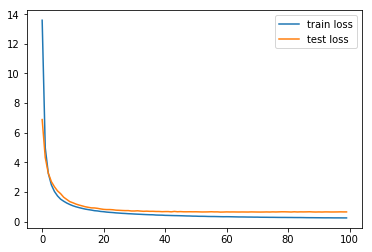

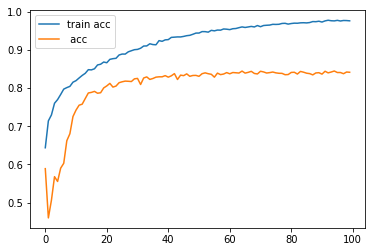

In [18]:
print("Log data: ", results.history.keys())

plt.figure(1)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['train loss', 'test loss'])

plt.figure(2)
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.legend(['train acc', ' acc'])

#### Note: We can say that the model is quite overfitting. Maybe it is because our data set is quite small.

## How to tune hyperparameters <br>eg. the Learning Rate 

Note: The learning rate is one of the most important hyperparameters.

In [19]:
import keras.backend as K
K.clear_session()

In [20]:
dflist = []

learning_rates = [0.001, 0.01, 0.05, 0.1]

for lr in learning_rates:

    K.clear_session()

    
    model = Sequential()
    model.add(Dense(1024, input_shape=(features_num,),kernel_regularizer='l2', 
                    kernel_initializer='he_normal', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(256,kernel_regularizer='l2', kernel_initializer='he_normal', 
                    activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(7, activation='softmax'))
    model.compile(Adam(lr=lr,epsilon= 1e-08, decay=0.1),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    
    
    h = model.fit(x_train, y_train, epochs=50, 
                  batch_size=256, 
                  validation_data=(x_test, y_test), verbose=0)
    
    
    dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [21]:
historydf = pd.concat(dflist, axis=1)

In [22]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

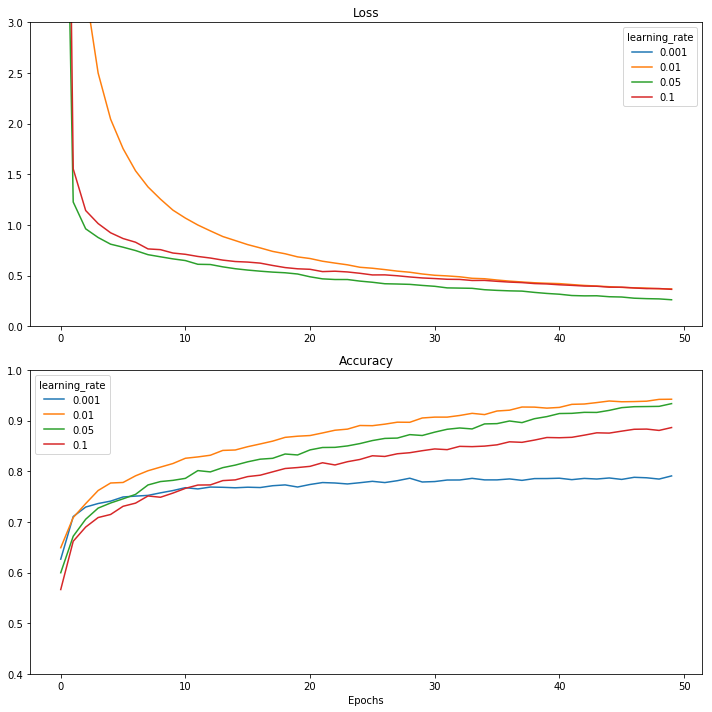

In [24]:
plt.figure(figsize=(10,10))
ax = plt.subplot(211)
historydf.xs('loss', axis=1, level='metric').plot(ylim=(0,3), ax=ax)
plt.title("Loss")

ax = plt.subplot(212)
historydf.xs('acc', axis=1, level='metric').plot(ylim=(0.4,1), ax=ax)
plt.title("Accuracy")
plt.xlabel("Epochs")

plt.tight_layout()